# O Algoritmo Deutsch-Jozsa

### Autores:
###### Paulo Sérgio Ribeiro
###### Pedro Antônio de Souza Silva

## Uma Breve História:

David Deutsch propôs um algoritmo quantico (Algoritmo de Deutsch, apenas) que determinava se uma função $f:\mathbb{B} \rightarrow \mathbb{B}$ era constante ou balanceada, o detalhe adicional que formou o algoritmo de Deutsch-Jozsa foi justamente a contribuição de Richard Jozsa (Um dos coinventores do teleporte quântico de informação), que notou que era possível manter a propriedade do algoritmo para além do caso $\mathbb{B} \rightarrow \mathbb{B}$ , provando ser aplicável em   $f:\mathbb{B^n} \rightarrow \mathbb{B}$ 

## Importações Úteis

In [15]:
import numpy as np
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister
from qiskit import QuantumRegister
from qiskit import execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram

## O Circuito

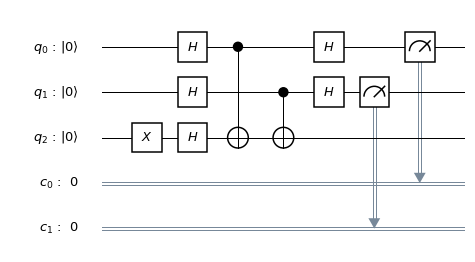

In [24]:
#Criação de um registrador quântico com 3 bits
q = QuantumRegister(3, 'q')

#Criação de um circuito quântico agindo no registrador q
circuito = QuantumCircuit(q)

#Criação de um circuito clássico com 2 bits
c = ClassicalRegister(2, 'c')

#Criação de um circuito quântico
quant = QuantumCircuit(q, c)
quant.barrier(q)

#Mudamos a fase do qubit de baixo
quant.x(q[2])

quant.barrier(q)

#Aplicamos Hadamard em todos os qubits do topo
for bit in range(3):
    quant.h(q[bit])

#Aplicamos a função
for bit in range(2):
    quant.cx(q[bit], q[2])
    
quant.barrier(q)

#Aplicamos Hadamard novamente nos qubits do topo
for bit in range(2):
    quant.h(q[bit])

quant.barrier(q)

#Mapeamento da medição dos qubits para os bits clássicos
for bit in range(2):
    quant.measure(q[bit], c[bit])

qc = circuito + quant

circuit_drawer(qc)

## Explicação Teórica e Matemática:

Segundo o circuito, após levarmos o qubit de baixo de $|0\rangle$ para $|1\rangle$, para n qubits de entrada no topo temos o estado incial:

$$
|\psi_0\rangle = |0\rangle^{\otimes n}|1\rangle
$$

<br>

Aplicando Hadamard em todos os qubits, levamos todos a um estado de superposição, obtendo assim:

$$
|\psi_1\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}|x\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

<br>

Agora, $U_{f}$ entra em ação, que devolve:

$$
|\psi_2\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}(-1)^{f(x)}|x\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

<br>

Para finalizar, aplicamos Hadamard somente aos vetores de qubits do topo, assim:

$$
|\psi_3\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}(-1)^{f(x)}H^{\otimes n}|x\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

<br>

Como os bits do vetor $|x\rangle$ já se encontram em superposição, quando aplicamos Hadamard novamente, obtemos

$$
H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}}\sum_{z}(-1)^{<x,z>}|z\rangle
$$

<br>

Uma superposição de uma superposição! Juntando tudo, enfim ficamos com:

$$
|\psi_3\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}(-1)^{f(x)}\sum_{z}\frac{1}{\sqrt{2^n}}(-1)^{<x,z>}|z\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

<br>

Rearranjando:

$$
|\psi_3\rangle = \frac{1}{2^n}\sum_{z}\sum_{x}(-1)^{f(x) \ \oplus \ <x,z>}|z\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

<br>


## Exemplo Simulado em um Computador Clásssico

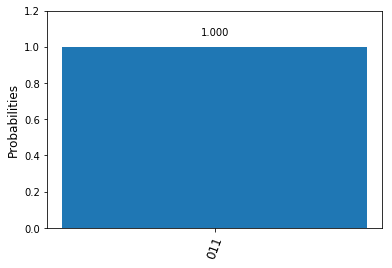

In [17]:
backend = Aer.get_backend('qasm_simulator')
rodadas = 1000

tarefa = execute(qc, backend = backend, shots = rodadas)

resultado = tarefa.result()
contador = resultado.get_counts(qc)

plot_histogram(contador)

## Exemplo Real:

Primeiro, verificamos quais os computadores que estão disponíveis:

In [5]:
from qiskit import IBMQ
#IBMQ.save_account('SEU TOKEN AQUI')
IBMQ.load_accounts()
print("Backends disponíveis:")
IBMQ.backends()

Backends disponíveis:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

O tempo de espera de uma simulação em um computador quântico real pode ser desconfortavelmente grande. A fila para acessar um deles pode estar imensa em dado momento. Uma alternativa para minimizar o tempo de espera é importarmos a função 'least_busy', que verifica qual dos backends atuais estão menos ocupados no momento.

In [6]:
from qiskit.backends.ibmq import least_busy

dispositivo = IBMQ.backends(filters = lambda x: x.configuration()['n_qubits'] > 3 and not x.configuration()['simulator'])

backend = least_busy(dispositivo)

print("O melhor é " + backend.name())

O melhor é ibmqx4


Sabendo qual deles está menos ocupado no momento, salvamos essa informação em uma variável - aqui a nomeamos $backend$ - para, enfim, rodarmos nossa simulação em um computador quântico real.

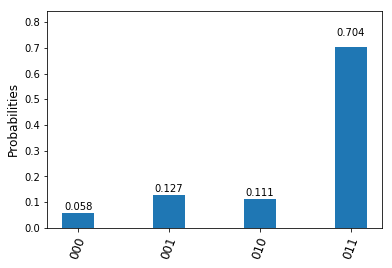

In [7]:
rodadas = 1000
creditos = 3
tarefa = execute(qc, backend = backend, shots = rodadas, max_credits = creditos)

resultado = tarefa.result()
contador = resultado.get_counts(qc)

plot_histogram(contador)

## Conclusão:

Se fizermos a medição e obtivermos apenas um vetor de 0s $|000...0\rangle$, significa que a função é constante. Caso contrário, será balanceada.

<br>